In [1]:
import gzip
import pickle
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

# Loading data

In [2]:
path = 'flatland_train.data'
X,y = pickle.load(gzip.open(path,'rb')) #(1000,50,50)

# data pre-proc
y[y != 0] -= 2
X = X / 255.

Pasidaliname duomenis į train ir test splitus proporcija train:test = 7:3

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42) # nepadalinti (1000,50,50)

In [4]:
X_train.shape

(7000, 50, 50)

In [5]:
X_test.shape

(3000, 50, 50)

Galime kaip darėme su fashion MNIST dataset'u, pasibraižyti figūrų ir po keletą pavyzdžių iš kiekvienos klasės:

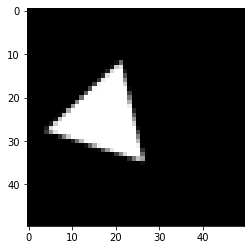

In [ ]:
plt.imshow(X_test[0],cmap='gray')

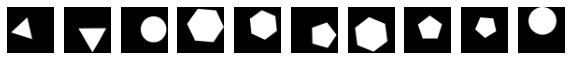

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(10):
        plt.subplot(10, 10, 10 + i + 1)
        plt.imshow(X_test[i], cmap='gray')
        plt.axis('off')
plt.show()

Kiek turim klasių?

In [ ]:
from collections import Counter 

Counter(y)

Counter({0.0: 1381, 1.0: 2853, 2.0: 1868, 3.0: 2137, 4.0: 1761})

Turime 5 klases, iš jų kiekvienos po figūrą:

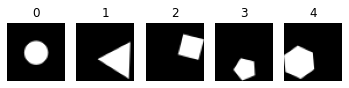

In [ ]:
for i in range(5):
    idx= np.where(y_train == i)[0][0]
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[idx],cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show() # padarem po viena skirtinga is kiekvienos klases

# DNN
Bandome konstruoti modelį su DNN

In [ ]:
keras.layers.Dense?

In [ ]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(320,activation='relu')) 
model.add(keras.layers.Dense(160,activation='relu')) 
model.add(keras.layers.Dense(80,activation='relu')) 
model.add(keras.layers.Dense(40,activation='relu')) 
model.add(keras.layers.Dense(20,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 2500)              0         
                                                                 
 dense_51 (Dense)            (None, 320)               800320    
                                                                 
 dense_52 (Dense)            (None, 160)               51360     
                                                                 
 dense_53 (Dense)            (None, 80)                12880     
                                                                 
 dense_54 (Dense)            (None, 40)                3240      
                                                                 
 dense_55 (Dense)            (None, 20)                820       
                                                                 
 dense_56 (Dense)            (None, 10)              

In [ ]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
219/219 [==============================] - 2s 7ms/step - loss: 1.7339 - accuracy: 0.3726 - val_loss: 1.2600 - val_accuracy: 0.4843
Epoch 2/25
219/219 [==============================] - 1s 6ms/step - loss: 1.1564 - accuracy: 0.5129 - val_loss: 1.0968 - val_accuracy: 0.5257
Epoch 3/25
219/219 [==============================] - 1s 5ms/step - loss: 0.9800 - accuracy: 0.5861 - val_loss: 0.9766 - val_accuracy: 0.5717
Epoch 4/25
219/219 [==============================] - 1s 5ms/step - loss: 0.8133 - accuracy: 0.6567 - val_loss: 0.8801 - val_accuracy: 0.6170
Epoch 5/25
219/219 [==============================] - 1s 6ms/step - loss: 0.6922 - accuracy: 0.7136 - val_loss: 0.8388 - val_accuracy: 0.6547
Epoch 6/25
219/219 [==============================] - 1s 6ms/step - loss: 0.6349 - accuracy: 0.7386 - val_loss: 0.7500 - val_accuracy: 0.6847
Epoch 7/25
219/219 [==============================] - 1s 5ms/step - loss: 0.5849 - accuracy: 0.7609 - val_loss: 0.6709 - val_accuracy: 0.7253
Epoch 

In [ ]:
pred = model.predict(X_test).argmax(axis=1)

print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 85.73%


Gauname apie 86% tikslumą su simple test set, išsisaugome modelį

In [ ]:
model.save('model.h5')


## Test your model!!!

In [ ]:
model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.9264

Gautas tikslumas ant train set'o yra apie 92%, galime bandyti pamodifikuoti modelį, bandydami gauti geresnį rezultatą

In [ ]:
model = keras.models.Sequential()
# all data pre-processing should be in keras model!
model.add(keras.layers.Flatten(input_shape=(50,50)))
model.add(keras.layers.Dense(512,activation='relu')) 
model.add(keras.layers.Dense(256,activation='relu')) 
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128,activation='relu')) 
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(64,activation='relu'))
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy',
             #optimizer='adam', #NAUJAS OPTIMIZERIS, GALI LABAI PADET!!!
             optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])
#if you use categorical_crossentropy then it expects one hot encoded output
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 2500)              0         
                                                                 
 dense_57 (Dense)            (None, 512)               1280512   
                                                                 
 dense_58 (Dense)            (None, 256)               131328    
                                                                 
 dense_59 (Dense)            (None, 128)               32896     
                                                                 
 dense_60 (Dense)            (None, 64)                8256      
                                                                 
 dense_61 (Dense)            (None, 10)                650       
                                                                 
Total params: 1,453,642
Trainable params: 1,453,642
N

In [ ]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=23)

Epoch 1/23
219/219 [==============================] - 2s 7ms/step - loss: 1.3545 - accuracy: 0.4349 - val_loss: 1.2091 - val_accuracy: 0.5067
Epoch 2/23
219/219 [==============================] - 1s 6ms/step - loss: 1.0678 - accuracy: 0.5540 - val_loss: 1.0280 - val_accuracy: 0.5740
Epoch 3/23
219/219 [==============================] - 1s 6ms/step - loss: 0.8280 - accuracy: 0.6584 - val_loss: 0.8067 - val_accuracy: 0.6537
Epoch 4/23
219/219 [==============================] - 1s 6ms/step - loss: 0.6752 - accuracy: 0.7279 - val_loss: 0.7418 - val_accuracy: 0.6777
Epoch 5/23
219/219 [==============================] - 1s 6ms/step - loss: 0.5897 - accuracy: 0.7584 - val_loss: 0.6611 - val_accuracy: 0.7363
Epoch 6/23
219/219 [==============================] - 1s 6ms/step - loss: 0.5486 - accuracy: 0.7744 - val_loss: 0.6436 - val_accuracy: 0.7293
Epoch 7/23
219/219 [==============================] - 1s 6ms/step - loss: 0.5007 - accuracy: 0.7924 - val_loss: 0.6753 - val_accuracy: 0.7207
Epoch 

In [ ]:
pred = model.predict(X_test).argmax(axis=1)

print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 85.90%


In [ ]:
import pandas as pd

Pakaitaliojam learning rate optimizeryje 

Bandom overfittint

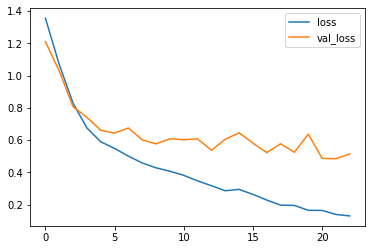

In [ ]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

# Bandom su dropoutu

In [ ]:
keras.layers.Dropout?

In [ ]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
                batch_size=156)
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

# CNN

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                      

In [ ]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8)

Epoch 1/8
219/219 [==============================] - 5s 17ms/step - loss: 1.1357 - accuracy: 0.5754 - val_loss: 3.0182 - val_accuracy: 0.1520
Epoch 2/8
219/219 [==============================] - 3s 15ms/step - loss: 0.3146 - accuracy: 0.9294 - val_loss: 4.4407 - val_accuracy: 0.2587
Epoch 3/8
219/219 [==============================] - 3s 15ms/step - loss: 0.1655 - accuracy: 0.9706 - val_loss: 1.8614 - val_accuracy: 0.3790
Epoch 4/8
219/219 [==============================] - 3s 14ms/step - loss: 0.1101 - accuracy: 0.9806 - val_loss: 0.1899 - val_accuracy: 0.9580
Epoch 5/8
219/219 [==============================] - 3s 14ms/step - loss: 0.0884 - accuracy: 0.9807 - val_loss: 0.1966 - val_accuracy: 0.9657
Epoch 6/8
219/219 [==============================] - 3s 14ms/step - loss: 0.0675 - accuracy: 0.9850 - val_loss: 0.1691 - val_accuracy: 0.9723
Epoch 7/8
219/219 [==============================] - 3s 15ms/step - loss: 0.0517 - accuracy: 0.9874 - val_loss: 0.1611 - val_accuracy: 0.9747
Epoch 

In [ ]:
pred = model.predict(X_test).argmax(axis=1)

print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 96.40%


In [ ]:
model.save('2_model_CNN.h5')

ant simple test set'o gauname 

In [ ]:
model = keras.models.load_model('2_model_CNN.h5')
evaluate('flatland_train.data', model)

0.9809

In [ ]:
import pandas as pd

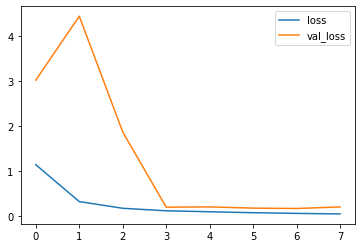

In [ ]:
pd.DataFrame(loss.history)[['loss','val_loss']].plot()

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization(axis=-1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                        

In [ ]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 1.2457 - accuracy: 0.5217 - val_loss: 2.6485 - val_accuracy: 0.2280
Epoch 2/20
219/219 [==============================] - 3s 12ms/step - loss: 0.5861 - accuracy: 0.7950 - val_loss: 4.7310 - val_accuracy: 0.2380
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.3439 - accuracy: 0.8936 - val_loss: 2.9196 - val_accuracy: 0.3140
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.2039 - accuracy: 0.9509 - val_loss: 0.4492 - val_accuracy: 0.8560
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.1324 - accuracy: 0.9693 - val_loss: 0.3041 - val_accuracy: 0.9230
Epoch 6/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0806 - accuracy: 0.9816 - val_loss: 0.2755 - val_accuracy: 0.9350
Epoch 7/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0487 - accuracy: 0.9901 - val_loss: 0.2332 - val_accuracy: 0.9500

In [ ]:
pred = model.predict(X_test).argmax(axis=1)

print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 96.33%


In [ ]:
model.save('model_CNN_cnn.h5')

In [ ]:
model = keras.models.load_model('model_CNN_cnn.h5')
evaluate('flatland_train.data', model)

0.9883

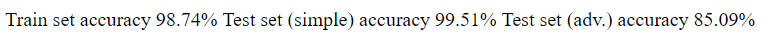

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1])) 
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(keras.layers.BatchNormalization(axis=-1)) 
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 22, 22, 32)       128       
 chNormalization)                                                
                                                      

In [12]:
loss = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Epoch 1/50
55/55 [==============================] - 4s 31ms/step - loss: 1.8504 - accuracy: 0.3336 - val_loss: 2.1881 - val_accuracy: 0.2060
Epoch 2/50
55/55 [==============================] - 1s 22ms/step - loss: 1.2954 - accuracy: 0.4727 - val_loss: 2.1091 - val_accuracy: 0.2010
Epoch 3/50
55/55 [==============================] - 1s 22ms/step - loss: 1.0492 - accuracy: 0.5779 - val_loss: 2.1725 - val_accuracy: 0.1520
Epoch 4/50
55/55 [==============================] - 1s 22ms/step - loss: 0.8306 - accuracy: 0.6699 - val_loss: 2.6566 - val_accuracy: 0.1520
Epoch 5/50
55/55 [==============================] - 1s 24ms/step - loss: 0.6690 - accuracy: 0.7497 - val_loss: 3.2458 - val_accuracy: 0.1520
Epoch 6/50
55/55 [==============================] - 1s 24ms/step - loss: 0.5197 - accuracy: 0.8196 - val_loss: 4.0751 - val_accuracy: 0.1523
Epoch 7/50
55/55 [==============================] - 1s 22ms/step - loss: 0.4147 - accuracy: 0.8629 - val_loss: 3.8388 - val_accuracy: 0.1707
Epoch 8/50
55

In [13]:
pred = model.predict(X_test).argmax(axis=1)

print('Accuracy on test set - {0:.02%}'.format((pred == y_test).mean()))

Accuracy on test set - 97.03%


In [14]:
model.save('modelis_CNN.h5')

In [15]:
model = keras.models.load_model('modelis_CNN.h5')
evaluate('flatland_train.data', model)

0.9904

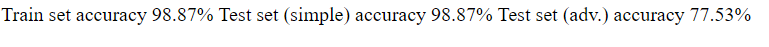

Gavome blogesnį rezultatą su advanced dataset'u, kol kas geriausias buvo su modeliu 1_model_CNN.h5

# Transfer learning

In [ ]:
# Default input is 32x32x3, it might de different in your application
mobile_net = keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Let's fix those weights
for layer in mobile_net.layers:
    layer.trainable = False
    
# Adding new trainable Dense layers
inputs = keras.layers.Input(shape=(32, 32, 3))
# Note that we might need to upsample our images if they are too small (less than 32x32), this is done via:
# inputs = keras.layers.UpSampling2D((2, 2))(inputs)
embedding = mobile_net(inputs)
# Output shape for sure is problem dependant, but this should give you the idea
output = keras.layers.Flatten()(embedding)
output = keras.layers.Dense(10, activation='softmax')(output)
# Build the model
model = keras.models.Model(inputs=inputs, outputs=output)
model.summary()